In [ ]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.Collecting statsmodels
  Using cached statsmodels-0.14.2-cp311-cp311-win_amd64.whl.metadata (9.5 kB)
  Using cached scipy-1.14.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached statsmodels-0.14.2-cp311-cp311-win_amd64.whl (9.9 MB)
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)
Using cached scipy-1.14.0-cp311-cp311-win_amd64.whl (44.7 MB)




[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data
data = pd.read_csv('../data/treasury_data.csv')
data.head()

,month-year,tot_pub_debt_out_amt,Surplus (+) or Deficit (-),Total Outlays,Total Receipts
0,2015-03,1.815206e+13,-5.291006e+10,2.870974e+11,2.341873e+11
1,2015-04,1.815256e+13,1.567141e+11,3.150872e+11,4.718012e+11
2,2015-05,1.815285e+13,-8.238528e+10,2.947711e+11,2.123858e+11
3,2015-06,1.815200e+13,5.177576e+10,2.911573e+11,3.429331e+11
4,2015-07,1.815132e+13,-1.491868e+11,3.746801e+11,2.254934e+11


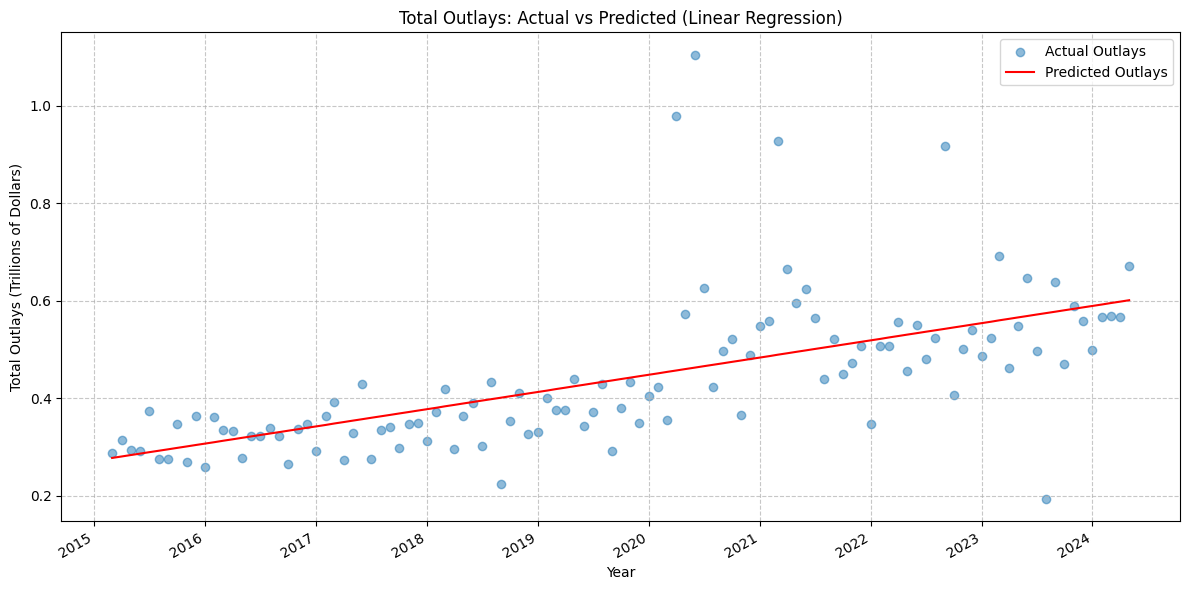

                            OLS Regression Results                            
Dep. Variable:          Total Outlays   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     65.87
Date:                Sun, 30 Jun 2024   Prob (F-statistic):           7.94e-13
Time:                        19:18:06   Log-Likelihood:                 76.742
No. Observations:                 111   AIC:                            -149.5
Df Residuals:                     109   BIC:                            -144.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
time_index     0.0029      0.000      8.116      0.0

In [ ]:
from statsmodels.tsa.tsatools import add_trend
from statsmodels.api import OLS
import matplotlib.dates as mdates

# Load the data
data = pd.read_csv('../data/treasury_data.csv', parse_dates=['month-year'])
data = data.sort_values('month-year')

# Create a time index
data['time_index'] = range(len(data))

# Convert outlays to trillions
data['Total Outlays'] /= 1e12

# Prepare the data for regression
X = add_trend(data['time_index'], trend='c')
y = data['Total Outlays']

# Fit the model
model = OLS(y, X).fit()

# Generate predictions
data['predicted_outlays'] = model.predict(X)



# Create the plot
plt.figure(figsize=(12, 6))
plt.scatter(data['month-year'], data['Total Outlays'], label='Actual Outlays', alpha=0.5)
plt.plot(data['month-year'], data['predicted_outlays'], label='Predicted Outlays', color='red')
plt.title('Total Outlays: Actual vs Predicted (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Total Outlays (Trillions of Dollars)')
plt.legend()

# Format x-axis to show only years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

# Display the plot
plt.show()

# Print the regression summary
print(model.summary())

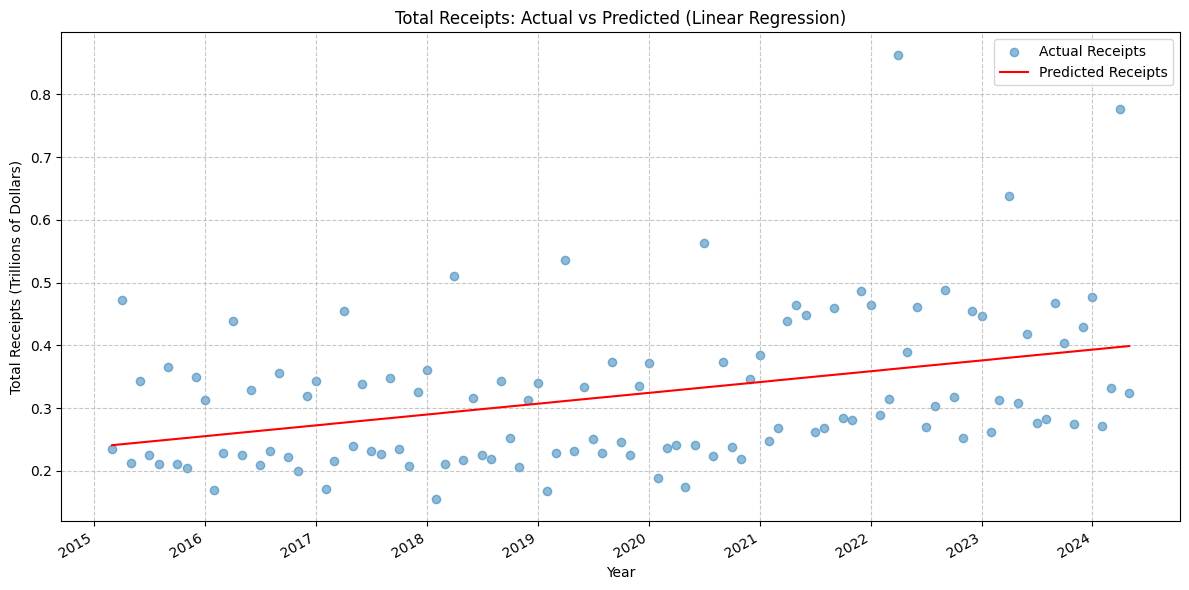

                            OLS Regression Results                            
Dep. Variable:         Total Receipts   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     18.70
Date:                Sun, 30 Jun 2024   Prob (F-statistic):           3.40e-05
Time:                        19:19:19   Log-Likelihood:                 86.354
No. Observations:                 111   AIC:                            -168.7
Df Residuals:                     109   BIC:                            -163.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
time_index     0.0014      0.000      4.324      0.0

In [ ]:
from statsmodels.tsa.tsatools import add_trend
from statsmodels.api import OLS
import matplotlib.dates as mdates

# Load the data
data = pd.read_csv('../data/treasury_data.csv', parse_dates=['month-year'])
data = data.sort_values('month-year')

# Create a time index
data['time_index'] = range(len(data))

# Convert Receipts to trillions
data['Total Receipts'] /= 1e12

# Prepare the data for regression
X = add_trend(data['time_index'], trend='c')
y = data['Total Receipts']

# Fit the model
model = OLS(y, X).fit()

# Generate predictions
data['predicted_Receipts'] = model.predict(X)



# Create the plot
plt.figure(figsize=(12, 6))
plt.scatter(data['month-year'], data['Total Receipts'], label='Actual Receipts', alpha=0.5)
plt.plot(data['month-year'], data['predicted_Receipts'], label='Predicted Receipts', color='red')
plt.title('Total Receipts: Actual vs Predicted (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Total Receipts (Trillions of Dollars)')
plt.legend()

# Format x-axis to show only years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

# Display the plot
plt.show()

# Print the regression summary
print(model.summary())